# Analyzing Profitable App Profiles in Google Play and Apple Store
In this project, we are hired as a Data Analyst for a company that makes applications in Andriod and iOS. We only make free to install english applications. We make revenue out of our applications through in-app ads which means the more user that we have that sees and engages in ads, the more revenue that we get. 

*Our goal for this project is to analyze applications from Apple Store and Google Play Store that are English, Free-to-use apps to help our developers understand what type of apps are likely to attract more users hence, we will look at three different factors of a succesfull app, namely:*
- Number of Installs
- Number of Reviews
- Number of Apps in that genre

## Summary of Results
After careful cleaning, prepping and analysis, the two factors we heavily focused on is **Number of Installs** and **Number of Reviews** since we found no evidence of **Number of Apps in that genre** that are linked to being profitable. All the findings for a popular and profitable apps that we get have more installs and reviews which are connected to our goal.

We decided to invest in Gaming App and extend our Free Application in Paid Application with added games like how to cut nails, facial massages, waxing of hair, all the mesmerizing stuff to add and chunk that all in one app or different ones, the developers are the ones that going to decide this.

Throughout the Analysis we found out why are different companies even small ones are in the Application Industry since we found out that category and genre both paid and free, Application in **Games** has one of the most number of installs and reviews and this is a good indication of a thriving, profitable app.


*For more details, you can explore the steps below*

OR

[click here to view the conclusion below](#conclusion)

Before reading and opening the dataset into Jupyter Notebook, let's first create a function to explore the dataset for us.

In [1]:
def explore_data(dataset, start, end, row_and_columns=False):
    """Display the number of specified row along with the number of row and columns
    
    Args:
     - dataset : a list of list data set
     - start : starting index of the data you want to explore
     - end : ending index of the data you want to explore
     - row_and_columns (Optional) : Defaulted to `False` if no value is supplied. 
       Put `True` if you want to print out the rows of data
        
    Returns:
     a specified list of range of rows separated by newline.
    """
    data_slice = dataset[start:end]; # The range of rows in the data set that we want to explore
    
    for row in data_slice: # Printing the rows from the range of rows(`data_slice`) one-by-one with newline
        print(row);
        print("\n");
    
    if row_and_columns: # Print the number of rows and column of the original data set
        print("Number of rows: {len_row_dataset:,}".format(len_row_dataset=len(dataset)));
        print("Number of columns: {len_col_dataset:,}".format(len_col_dataset=len(dataset[0])));
        print("\n")

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play. Collecting and analyzing this much data requires huge amount of money and resources, hence we are going to use a sample of the data instead.

The sample data that we are going to use has only 10,000+ Android Apps for Google Play and 7,000+ iOS Apps for Apple Store. To know more about this data, click each documentation below.
## Apple Store Documentation: [Click Here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)
###### Some Ambiguous Column Explanation
- "sup_devices.num": Number of supporting devices
- "ipadSc_urls.num": Number of screenshots showed for display
- "lang.num": Number of supported languages
- "vpp_lic": Vpp Device Based Licensing Enabled

## Google Play Store Documentation: [Click Here](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv)
###### Some Ambiguous Column Explanation
- "Type": Paid or Free

In [2]:
from csv import reader;
# Read in data (For iOS)
open_fileAS = open("AppleStore.csv", encoding='utf-8');
read_fileAS = reader(open_fileAS);

# Read in data (For Android)
open_fileGPS = open("googleplaystore.csv", encoding='utf-8');
read_fileGPS = reader(open_fileGPS);

# Turn the Apple Store csv file into a list of list
ios_data = list(read_fileAS);
ios_header = ios_data[0]; # iOS Column Headers
ios_data = ios_data[1:]; # Excluding the header row

# Turn the Google Play Store csv file into a list of list
android_data = list(read_fileGPS);
android_header = android_data[0]; # iOS Column Headers
android_data =android_data[1:]; #Excluding the header row

# Function `explore_data' to Explore the rows of the data set
print(ios_header, "\n");
explore_data(ios_data, 0, 2, True);
print(android_header, "\n");
explore_data(android_data, 0, 2, True);

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 7,197
Number of columns: 16


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Every

#### Output Explanation
We can see here that our iOS Data set has 7,197 entries / application and has 16 columns to categorize each information in the row. **track_name**, **rating_count_tot** and **prime_genre** are the ones that we are going to use for our analysis. 

10,841 applications for android data set with 13 columns to identify each information in the row. **App**, **Category**, **Rating**, **Reviews** are the ones that we are going to use frequently to help our analysis.

## Cleaning
Before diving into analyzing our dataset, we first need to _"clean"_ it in order to produce accurate and relevant results.In order to call our data set _"clean"_ we need each data entry/point to be consistent, hence in this section we are going to find any inconsistent data in our data set like for example, **Duplicate entries**, **Data that aren't needed in our analysis** or **"Missing" / Incomplete entries***.

### Walkthrough Explanation ( Removing Incomplete Data Entries )
Upon checking the documentation for both platforms, One user pointed out and describe an error in Android Data Set in which there is a missing **Category** value hence a column shift happens.

*We can verify this by making a function that checks if the length of the column row header of a data set is not equal to the number of elements of a row in the dateset, then we display that particular row.* 

In the below code, we:
1. Identify if the dataset given is Google or Apple and assign the approriate column length.
2. Checks every row if the length of the current row is equal to the length of the header row.
3. If not, display it.

In [3]:
def isLength_row(dataset, store):
    """function to identify data entries that has incomplete details.
    
    Args:
     - dataset: a list of list dataset
     - store: Either "Google" or "Apple"
        
    Returns:
     A list of duplicate entry
    """
    length = 0;
    
    # Checks if store is either google or apple and assign corresponding column length
    if store == "google" or store == "Google":
        length = 13
    elif store == "apple" or store == "Apple":
        length = 16;
    else:
        print("Wrong store! Input an appropriate store...");
        
    # Checks every row in the data set if its number of elements is not equal to the column length
    for row in dataset:
        if len(row) != length:
            print("Store name:", store);
            print(row, "\n");
            print("Index of the row:", dataset.index(row))

> If a row is printed below, delete it with the syntax **"del dataset[index]"** else **don't do anything**.

In [4]:
isLength_row(ios_data, "apple"); # iOS Data
print(android_header, "\n")
isLength_row(android_data, "google"); # Android Data

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

Store name: google
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up'] 

Index of the row: 10472


#### Output Explanation
By making an `isLength_row()` function, we did verify that there is a data entry that has a missing **Category** value that resulted to _"1.9"_ being the category for the app. We are also presented by the index of that row necessary for _"row deletion"_.

> As the category column being a vital column header for our analysis, we need to remove this as this will provide incorrect result for our analysis.

We've also applied the function to the Apple Data Set and we found no row having an incomplete data, hence we are moving forward.

##### Code Explanation
Since we identified a row that doesn't have a equal length of its dataset, we've decided to remove it.
> **Warning!:** *Don't rerun this code if your only objective is to remove a single row from the data set*

In [5]:
print("Before Row 10472 Deletion: {}\n".format(android_data[10472]));
del android_data[10472]; # Deletes a certain row in android_data
print("After Row 10472 Deletion: {}".format(android_data[10472]));

Before Row 10472 Deletion: ['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']

After Row 10472 Deletion: ['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']


#### Output Explanation
We can confirm that we have deleted the specific row that has a missing value by printing the same index of row and getting different results above.

### Walkthrough Explanation ( Removing Duplicate Data Entries ) 
We are done cleaning our data with *missing values*. The second step that we are going to take is to check for duplicate entries that our data has. For large data sets, it is common to have errors such as duplicate entries that will result to incorrect and unwanted results for our analysis hence it is safe to assume that every data set that we are working on has an error.

In the below code, we:
1. Print the header row.
2. Displayed every row in the android_data.
3. Displayed only the row/s with the application name of "Facebook".

In [6]:
print(android_header, "\n"); # Header of Google Play Data Set

for app in android_data: # Iterate every app in the data set
    name = app[0];
    
    # Print apps that has a name of "Facebook"
    if name == "Facebook": 
        print(app, "\n");

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Facebook', 'SOCIAL', '4.1', '78158306', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'August 3, 2018', 'Varies with device', 'Varies with device'] 

['Facebook', 'SOCIAL', '4.1', '78128208', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'August 3, 2018', 'Varies with device', 'Varies with device'] 



#### Output Explanation
Here we can see that for just one application, we can see 2 entries in our data set. This is not good, if we keep it like this it will skew the result of our analysis considering that facebook has many **Reviews** and **Installs** that are relevant in our analysis.

Upon a closer investigation in the rows, we have a slight difference of value in the **Reviews** column where there is a row that has a higher **Reviews** as compared to the other. We can assume that the data was collected at different times.
> *We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.*

We can verify that duplicate entries has different number of reviews by displaying the "Instagram" application below.

In [7]:
print(android_header, "\n"); # Header of Google Play Data Set

for app in android_data: # Iterate every app in the data set
    name = app[0];
    
    # Print apps that has a name of "Facebook"
    if name == "Instagram": 
        print(app, "\n");

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device'] 

['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device'] 

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device'] 

['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device'] 



Above, we have indeed verify it has varying **Reviews** value. The only thing left to do is to make an action about it. One important note to take into account is the **Instagram** **Reviews** column has different values and sometimes have the same **Reviews** value. We might get the highest value in our logic but we need to take into account the same values that has the highest **Reviews** value in order to get only one value.

We can create a function that counts how many Unique and Not Unique applications in the dataset to get a grasp on how _"unclean"_ our dataset is.

In the below code, we: <a name="unique_app"> </a>
1. Defined a list for unique and NOT unique applications.
2. Iterate over the rows in the dataset one by one.
3. Checks if the supplied dataset is Google or Apple and assign the appropriate row for the name of the application
4. Checks if the application is in the `unique_list` if yes, append it into `not_unique_list` if not, append it in `unique_list`
5. Print the length of both list and their store.

In [8]:
def unique_app(dataset, store): 
    """function that identifies if an Application Name has a duplicate entries in the data set
    
    Args:
     - dataset: A list of list dataset
     - store: Either "Google" or "Apple"
    
    Returns:
     - None: A string of printed number of Unique and Not Unique Applications
    """
    unique_list = [];
    not_unique_list = [];
    
    for row in dataset:
        # Checks every row in the data set if store is Google or Apple and store its app name to a variable `app_name`
        if store == "Google":
            app_name = row[0];
        elif store == "Apple":
            app_name = row[0];
        else:
            print("Wrong store!")
        
        # Checks if the app name is unique or not and appends it to the corresponding list
        if app_name in unique_list:
            not_unique_list.append(app_name);
        else:
            unique_list.append(app_name);
        
    # Prints how many apps are unique and not unique
    print("Number of Unique Apps: {num_unique:,} for {store}".format(num_unique=len(unique_list), store=store));
    print("Number of Not Unique Apps: {num_not_unique:,} for {store}".format(num_not_unique=len(not_unique_list), store=store));
    print("\n");

In [9]:
unique_app(ios_data, "Apple");
unique_app(android_data, "Google");

Number of Unique Apps: 7,197 for Apple
Number of Not Unique Apps: 0 for Apple


Number of Unique Apps: 9,659 for Google
Number of Not Unique Apps: 1,181 for Google




#### Output Explanation (Cont.)
Here we can see that iOS data set has pass the second cleaning with flying colors as there are no duplicate entries for this data set.

However, in the Android data set, we have 1,181 duplicate data entries. Imagine if we had not thought of checking our data set for duplicate data and just proceeding in our analysis, this will make bad decisions for our company and huge losses will be made. So, now we are much knowledgeable about how unclean our data set, let's proceed in cleaning it.

> **We are assuming that the highest reviews out of all the duplicate entries is the updated one**

To remove the duplicate entries and store only the application with the highest review, we can create a function yet again and contain the clean data into another list *only if* the application has the highest review and is not already in the clean list.

In the below code, we:
1. Assigned a list and dictionary in a variable.
2. Iterate over the rows in the dataset one by one.
3. Checks if the dataset supplied is either Google or Apple and then assign the appropriate row for the name of the app.
4. Checks if the `name` of the current app is in the `reviews_max` and if the `name` of the current app has the highest reviews compared from the duplicate app before, change the value of the `n_reviews` for the number of reviews of that current app. 
5. Checks again if the current value of `n_reviews` is equal in the value of `reviews_max` and is not in the `already_added` list, append that row in the already_added list. This is for the cases where the duplicate entries of the app has the same number of reviews, to avoid appending it twice in the  dictionary.

In [10]:
def remove_duplicates(dataset, store):
    """removes the duplicate entries of an application by identifying the entry that has the highest review and 
       then store that entry to a list to remove the duplicate reviews that are not at max reviews.
       
    Args:
     - dataset: A list of list of data set
     - store: Either "Google" or "Apple"

    Returns:
     Printed length of rows of `store_clean`
    """
    reviews_max = {}; # Dictionary containing the highest review of the duplicated entry
    store_clean = []; # list containing the cleaned data set
    already_added = []; # list of entries that have been already added in store_clean
    
    for row in dataset:
#       Checks if the data set is either Google or Apple and assign the corresponding name of the app to the variable `name`
        if store == "Google":
            name = row[0];
            n_reviews = int(row[3]); # The number of reviews of the current row for testing condition
        elif store == "Apple":
            name = row[1];
            n_reviews = int(row[5]); # The number of reviews of the current row for testing condition
        else:
            print("Wrong Store!");
            
        '''
        Checks if name is in the reviews_max 
        AND if the reviews for that app is at MAXIMUM VALUE for all duplucate entries
        if not, initialize the app in the reviews_max dictionary
        '''
        if name in reviews_max and reviews_max[name] < n_reviews:
            reviews_max[name] = n_reviews;
        elif name not in reviews_max:
            reviews_max[name] = n_reviews;
            
        '''
        Checks if the iteration of n_reviews is at `reviews_max` `AND`
        Checks if name is not in `already_added` list
        '''
        if n_reviews == reviews_max[name] and name not in already_added: # Extra list(already_added) for cases where applications that have the same number of reviews 
            store_clean.append(row);
            already_added.append(name);
    print("Number of Clean Rows: {rows:,} for {store}".format(rows=len(store_clean), store=store))    
    return store_clean

In [11]:
clean_android = remove_duplicates(android_data, "Google"); # Function to remove the duplicates in android data set
clean_ios = ios_data # Since no duplicate entries in ios data set

Number of Clean Rows: 9,659 for Google


#### Output Explanation (Cont.)
The number of clean rows that we get for "Android Data Set" is logically correct based on the function [unique_app()](#unique_app) that we created above and is ready for further cleaning.

The "iOS Data Set" doesn't needed to be cleaned in this part because as we have checked in `unique_app()` function, there is no duplicate data present. To save resources, we are only going to assign it to a new variable to denote that it is _"clean"_ 

## Prepping
After we are done with cleaning our data set with inconsistency, it is time to shape our data set with regards to our goal. This helps to preserve our time of querying our analysis and helps to avoid unwanted result for our analysis, leaving only important data that we need for our project.

### Walkthrough Explanation ( Filtering English Application )
We are done in the part of removing inconsistency in our data set, now we are going to shape our data set to match our goals for this project, that is to analyze *Free - English Applications*. As a precaution, we are going to check our data set if there is any non-english applications so that we can get an *App Profile* that is well suited in our goal leaving our data set with necessary data that we only need. 

Later on, we are going to filter out our data set again for *free applications*.

In [12]:
print(clean_ios[813][1]);
print(clean_ios[6713][1], "\n");
print(clean_android[4547][0]);
print(clean_android[4716][0]);

爱奇艺PPS -《欢乐颂2》电视剧热播
東京時層地図 for iPad 

中国語 AQリスニング
日本AV历史


#### Output Explanation
The output above is a clear indication that there really is an applications that are not targeted towards english speaking audiences. This applications isn't necessary for our analysis and must be removed to preserve resources and for our data set to only have necessary data that supplements our goal.

### Walkthrough Explanation ( Cont. )
Behind the scenes, each character we use in a string has a corresponding number associated with it. For instance, the corresponding number for character 'a' is 97, character 'A' is 65, and character '爱' is 29,233. We can get the corresponding number of each character using the ord() built-in function.

The number corresponding to english alphabets that we currenly use ranges from 0 to 127 according to [ASCII system](https://en.wikipedia.org/wiki/ASCII). We can use this as a criterion to check every character of an application name to check if it's an English Application Name. However, we have to take into account the applications that uses symbols in their naming.
> As a solution, we are creating a creteria in which if an application has less than 3 non english characters, then we are considering it as an _**English Application**_ to take into account the symbols used in naming applications.

We can do this my creating a helper function to check each letter in app name and iterate all of the row in the dataset.

In the below code, we:
1. Initialize `count_non_english` as a counting variable for every non-english character.
2. Iterate over each character in `name` parameter passed in.
3. Use the ord() function in each character and check if its greater than 127.
4. If yes, increment `count_non_english` by 1.
5. After the iteration is done for the current app `name`, it checks again if `count_non_english` is greater than 3, if yes return `False`, if NOT, return `True`.

In [13]:
def is_english(name):
    """Helper function to identify non-english applications
    Args:
     - name: the application name of the data set
     
    Returns:
     - (Boolean) True or False indicates if the name given is English or NOT English
    """
    count_non_english = 0;
    
    # Checks every character if its an english alphabet
    for character in name:
        if ord(character) > 127:
            count_non_english += 1;
            
    '''
    Checks if an app name has more than 3 non-english characters in its name then is not english app 
    else app is an english app 
    '''       
    if count_non_english > 3:
        return False;
    else:
        return True;

Since we have defined `is_english()` helper function, we can now iterate over on our dataset, get each application name in each row and use the helper function on that.

In the below code, we: <a name=code1></a>
1. Initialize two list for Android and iOS dataset to contain english apps.
2. Iterate on clean_android on every app 1 by 1.
3. assign the appropriate row for the app name in a variable `name`.
4. Call the `is_english()` function and pass the `name` variable defined in step 3.
5. If the `is_english()` function returns `True`, append it in the appropriate list defined in step 1.
6. Use the `explore_data()` function to get familiar with the new list of dataset defined in step 1.

In [14]:
android_english = []; # list of android english apps
ios_english = []; # list of ios english apps

# Filter english apps in android data set and append it in android_english list
for row in clean_android:
    name = row[0];
    
    if is_english(name): # Call is_english function to check if name is english
        android_english.append(row);
        
# Filter english apps in ios data set and append it in ios_english list
for row in clean_ios:
    name = row[1];
    
    if is_english(name): # Call is_english function to check if name is english
        ios_english.append(row);

print(android_header, "\n");
explore_data(android_english, 0, 3, True);
print(ios_header, "\n");
explore_data(ios_english, 0, 3, True);

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 9,614
Number of columns: 13


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['2848822

#### Output Explanation
Now we have a new list populated with **English Applications** needed for our analysis. We are down with 9,614 for android data set and 6,183 for ios data set.

We are on the final prepping of our data set which is to isolate the free applications in `android_english` and `ios_english` and make another list to contain that free applications

### Walkthrough Explanation ( Filtering Free Applications ) <a name="Free"></a>
Now that we have a new list that contains our English Applications, it is now time to extract only the free applications out of all the english apps in that list. One thing to note in the [code](#code1) above, we can see that free application in `android_english` dataset has of `Type` column FREE and its `Price` column is of string "0". The pattern can also be seen in `ios_english` with `price` column having a string value of "0.0" indicating that it is a free application. We can use this pattern that we see later in our code to filter `Free` Application.

In the below code, we:
1. Initialized two list for Android and iOS dataset.
2. Iterate over the rows in both dataset one by one.
3. Assigned the price of the app to `price` variable.
4. Checks if the price of the is equal to "0" or "0.0"
5. If yes, append it to the appropriate list defined in step 1.
6. Lastly, display the length of the defined dataset in step 1.

In [15]:
final_android = [];
final_ios = [];

# Filter free apps in android data set and append it in final_android
for row in android_english:
    price = row[7];
    
    if price == "0" or price == "0":
        final_android.append(row);
        
# Filter free apps in ios data set and append it in final_ios        
for row in ios_english:
    price = row[4];
    
    if price == "0.0" or price == "0":
        final_ios.append(row);

# Checks the length of both data set
print("Number of Free - English Application on Android: {:,}".format(len(final_android)));
print("Number of Free - English Application on iOS: {:,}".format(len(final_ios)));

Number of Free - English Application on Android: 8,862
Number of Free - English Application on iOS: 3,222


#### Output Explanation (Free Application)
We are down with 8,862 Android Applications removing 1,979 applications for our data set and 3,222 iOS Applications removing 3,975. That's a lot of apps that might have been interfered with our analysis. 

The saying _"data scientists spend around 80% of their time cleaning data, and only about 20% actually analyzing (cleaned) data"_ really is true in this case as we are *past* halfway into our project and we only did **Cleaning** and **Prepping** our data set for our final step ( Analysing ).

## Walkthrough Explanation ( Filtering Paid Applications )
Since we filetered "Free" Applications in our Walkthrough [here](#Free) and we initialized a list to contain that "Free" apps, we only need to step back once to get the dataset that didn't filter the "Free" apps what we want to do is the opposite. We can copy the code and reverse our code! Sounds fun? Let's Go!

In [104]:
paid_android = [];
paid_ios = [];

# Filter paid apps in android data set and append it in paid_android
for row in android_english:
    price = row[7];
    
    if price != "0":
        paid_android.append(row);
        
# Filter paid apps in ios data set and append it in paid_ios        
for row in ios_english:
    price = row[4];
    
    if price != "0.0":
        paid_ios.append(row);

# Checks the length of both data set
print("Number of Paid - English Application on Android: {:,}".format(len(paid_android)));
print("Number of Paid - English Application on iOS: {:,}".format(len(paid_ios)));

Number of Paid - English Application on Android: 752
Number of Paid - English Application on iOS: 2,961


#### Output Explanation ( Paid Application )
We are down with 752 Android Applications removing 10,089 applications for our data set and 2,961 iOS Applications removing 4236. That's a lot of apps removed, however, it must be done to answer our question. 

Now this dataset is clean because stepped back into filetering "Free" Applications and only get the list of list dataset that has "English" Applications, since we contain each walkthrough into different list, our process is "Non - Destructive!" thus we can go back and still be able to get the cleaned and prepped dataset! Without further ado, Let's dive into coding!

## Analysis
Our final step in this project. We are now going to focus analysing the cleaned data that we rigoriously prepared for this stage.

### Walkthrough Explanation ( Analysis )
To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of what are the most common genres for each market. For this, we'll need to build frequency tables for a few columns in our data sets.

We can write a test function to grasp what is the top category for both dataset.
> The criteria for our "top category" are: 
1. The app has greater than 4.3 rating and there, we get the category of the app
2. The category for that app is the most occuring in the in the dataset 

Now the logic is ready, we can now code our process.

In the below code, we: <a name="test-function"> </a>
1. Initialize a dictionary for both dataset that will contain the frequency table.
2. Iterate over the row in the dataset 1 by 1.
3. Assign the necessary columns to the variables for readability.
4. Checks if the `rating` for that row is greater than 4.3
5. If yes, checks if the `category` of the app is in `google_category` dictionary.
6. If yes, increment the value of the existing category by 1.
7. Lastly, display the name of the category that has the highest value in both dictionaries.

In [16]:
google_category = {};
ios_category = {};

# Check every app in android data set
for app in final_android:
    # Assign category and rating columns in variables for readability
    category = app[1];
    rating = float(app[2]);
    
    # Check every app that has a rating greater than 4.3
    if rating > 4.3:
        # If the category of app is in the google_category add 1 to it
        if category in google_category:
            google_category[category] += 1;
        # If the category of app is not in the google_category initialize value 1 
        else:
            google_category[category] = 1;
            
# Check every app in ios data set            
for app in final_ios:
    # Assign category and rating columns in variables for readability
    category = app[11];
    rating = float(app[7]);
    
    # Check every app that has a rating greater than 4.3
    if rating > 4.3:
        # If the category of app is in the ios_category add 1 to it
        if category in ios_category:
            ios_category[category] += 1;
        # If the category of app is not in the google_category initialize value 1 
        else:
            ios_category[category] = 1;
            
# Get the key that has the max value in each dictionary
print("Popular Genre for Google Play Store:", str(max(google_category, key=google_category.get)))
print("Popular Genre for Apple Store:", str(max(ios_category, key=ios_category.get))) 

Popular Genre for Google Play Store: FAMILY
Popular Genre for Apple Store: Games


#### Output Explanation
We see here that the FAMILY category dominates Google Play. We can assume that this is geared towards children however this category is vast, it might be a game, a tool, etc. and we are going to explore this in depth later. 

On the other hand, Apple Store has _"Games"_ that dominates their platform. This might be contradicting for some viewers as _**this is based on the most common and rating of 4.3 in the platform and is NOT based on the number of users in the category**_.

We can conclude that both Family and Games receive good reviews from their users and both categories are somewhat related. However this doesn't provide a clear view for our analysis so now we are going deep down the analysis.

### Walkthrough Explanation ( Frequency Table )
With our knowledge right now, we can only assess the most "occuring" or the most number of "install" with a "frequency table". We can create a function to automate the creation of a frequency table and apply the "DRY (Do not Repeat Yourself)" rule for developers. This way, we are only calling a function to create a *frequency table* instead of repeatedly writing the code.

In the below code, we:
1. Initialize two dictionaries to contain the frequency table and the frequency percents and one `total` variable as a counting variable
2. Iterate over all the rows in the dataset one by one.
3. Increment total by 1 to count how many rows in the dataset. Assign the column we are interested in a variable for readability
4. Check if the `column` is already in `freq_dict`, if yes, increment the value by 1, if no, initialize a value of 1.
5. Iterate to freq_dict and replace its value with percentage by dividing the current value by the number of total rows in the dataset passed in times by 100.

In [17]:
def freq_table(dataset, index):
    """Function to create frequency tables based on the index of a column.
    
    Args:  
     - dataset: a list of list data set
     - index: a number index of a column of the data set
     
    Returns:
     - freq_percent: The percentage value of the given column 
       that corresponds to the occurence of that column in the dataset
    """
    freq_dict = {}; # The Frequency Table
    freq_percent = {}; # The Percentage Frequency Table
    total = 0; # Variable to count how many rows in the data set
    
    for row in dataset:
        total += 1; 
        column = row[index]; # The column we want to make a frequency table with
        
        # If the column is in the freq_dict, add 1
        if column in freq_dict:
            freq_dict[column] += 1;
        # If the column is NOT IN the freq_dict, initialize 1
        else:
            freq_dict[column] = 1;
            
    for entry in freq_dict:
         freq_percent[entry] = freq_dict[entry]/total * 100 # Assign a percentage value to each key
        
    return freq_percent;

In [18]:
print("iOS prime_genre most occuring genre in descending order")
print("----------------------------------------------")
print(freq_table(final_ios, 11)); # iOS prime_genre column (Genre)

iOS prime_genre most occuring genre in descending order
----------------------------------------------
{'Social Networking': 3.2898820608317814, 'Photo & Video': 4.9658597144630665, 'Games': 58.16263190564867, 'Music': 2.0484171322160147, 'Reference': 0.5586592178770949, 'Health & Fitness': 2.0173805090006205, 'Weather': 0.8690254500310366, 'Utilities': 2.5139664804469275, 'Travel': 1.2414649286157666, 'Shopping': 2.60707635009311, 'News': 1.3345747982619491, 'Navigation': 0.186219739292365, 'Lifestyle': 1.5828677839851024, 'Entertainment': 7.883302296710118, 'Food & Drink': 0.8069522036002483, 'Sports': 2.1415270018621975, 'Book': 0.4345127250155183, 'Finance': 1.1173184357541899, 'Education': 3.662321539416512, 'Productivity': 1.7380509000620732, 'Business': 0.5276225946617008, 'Catalogs': 0.12414649286157665, 'Medical': 0.186219739292365}


We've create the frequency table, but its hard visualizing a pattern because of all of the noises that we can see here. we can sort this in descending order, limit the floating numbers into 2 and format the output by creating another function. `freq_table` will be called in this new sorting function as a helper function. 

We can use the `sorted` function to sort it in descending, however, with the arrangement of our `freq_table`, `sorted` only sorts the first value in our dictionary, meaning it will sort the `key` since it is the first value that it sees. We can get each key-value pair and swap it inside a tuple so that the first value will be the `value` not the `key` and will sort the numeric value. Since we now know the logic, let's get into coding. <a name="sort_values"> </a>

In the below code:
1. Called the helper function `freq_table` to make a frequency table out of the given dataset and column index.
2. Initialize a list that will contain list of tupples with swapped key-value pair from the helper function `freq_table`. Initialize a variable `num_displayed` as a counting variable for the number of displayed rows
3. Iterate over the created frequency table from the helper function `freq_table`.
4. Swap the key-value pair inside a tupple and append it  in `table_display` created in step 2.
5. After all the iteration is done, sort `table_display` in descending order and assign it to a new variable `table_sorted` to denote that it is sorted.
6. Iterate over the new variable `table_sorted` one by one.
7. Check if variable `num_displayed` is less than 15 denoting that 15 row will only be displayed.
8. Display the formatted output.
9. Increment `num_displayed` by one which means 1 row is printed.

In [19]:
def display_table(dataset, index):
    """Function to display the frequency table descending
    
    Args:
     - dataset: a list of list data set
     - index: a number indicating the column of the data set
    
    Returns:
     None: Displays the formatted strings of each tuple.
    """
    table = freq_table(dataset, index); # Call freq_table to generate frequency table
    table_display = [];
    num_displayed = 0; # Variable to limit the displayed apps
    
    for key in table:
        # Make a tuple out of (value, key) of a frequency table
        key_val_as_tuple = (table[key], key); 
        table_display.append(key_val_as_tuple);

    # Sort the tuples based on the value in descending order
    table_sorted = sorted(table_display, reverse = True);
    
    for entry in table_sorted:
        if num_displayed < 15: # Limit the displayed apps to only 25
            print('{genre_name} : {occur_percent:.2f}'.format(genre_name=entry[1], occur_percent=entry[0])); # Output Format
            num_displayed += 1;   

In [20]:
print("iOS prime_genre most occuring genre in descending order")
print("----------------------------------------------")
display_table(final_ios, 11); # iOS prime_genre column (Genre)

iOS prime_genre most occuring genre in descending order
----------------------------------------------
Games : 58.16
Entertainment : 7.88
Photo & Video : 4.97
Education : 3.66
Social Networking : 3.29
Shopping : 2.61
Utilities : 2.51
Sports : 2.14
Music : 2.05
Health & Fitness : 2.02
Productivity : 1.74
Lifestyle : 1.58
News : 1.33
Travel : 1.24
Finance : 1.12


#### Output Explanation
##### Apple Store `prime_genre` Column
Based on our [test function](#test-function) above, We can confirm now that **Games** dominates the ios market by a huge margin leaving this chart unbalaced. We can also see that the first 5 apps are targeted mainly to **entertain** their customers. Now we can ingrain in our minds that the go to applications by developers of iOS are **Games** or apps for **Entertainment**.

The frequency table alone implies that the genre **Games** has the most applications in Apple Store in terms of **"English Free Apps"** and doesn't imply that it has the most users. The interesting question here is that what drives the developers to invest in a Gaming Apps rather than other genres, Is it the hype? Large volume of users wanting games? or they see games as the most profitable genre?

Let us see now the Android dataset

In [21]:
print("Android category colum with most number of occurence in descending order");
print("-----------------------------------------------")
display_table(final_android, 1); # Google Category Column

Android category colum with most number of occurence in descending order
-----------------------------------------------
FAMILY : 18.45
GAME : 9.87
TOOLS : 8.44
BUSINESS : 4.59
LIFESTYLE : 3.90
PRODUCTIVITY : 3.89
FINANCE : 3.70
MEDICAL : 3.52
SPORTS : 3.40
PERSONALIZATION : 3.32
COMMUNICATION : 3.24
HEALTH_AND_FITNESS : 3.08
PHOTOGRAPHY : 2.95
NEWS_AND_MAGAZINES : 2.80
SOCIAL : 2.66


#### Output Explanation
##### Google Play `category` Column
Here we see again the category **Games** as the second most occuring, this only implies that **Games** is popular in making an application on both platforms. However, compared to the iOS market, the frequency table seems more balanced with category **FAMILY** being at the top followed by **Games**. Both categories are somewhat related because **FAMILY** are geared towards kids and sometimes in the form of **Games**.

**Family Genre with Games in it**
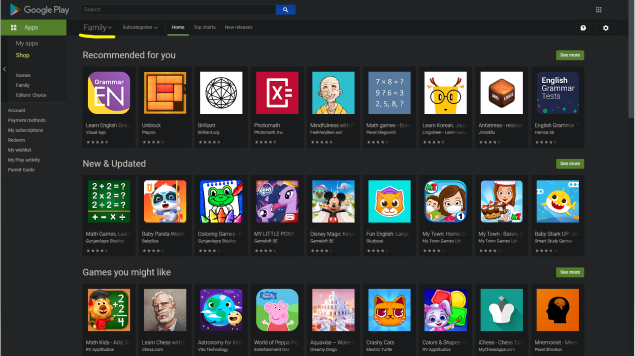
In Apple Store, as a collective genre, Entertainment dominates that platform however, here in Google Play, Tools as a collective genre, are more popular with **Games** appearing in both platforms in the top spot.

Based on the data gathered, we can dig deeper in  **FAMILY** and **Games** and see if this two category has some potential in it. We need to find out why this two categories has the most applications in it and it might uncover the answer in our question: "What are the popular, free-to-use applications to users".
>**BUT** this doesn't mean that genre **Games** are the most profitable path here. The only conclusion that we can get here is that **Games** and **FAMILY** are popular for the devs and later on we will found out why.

Upon inspecting the Android dataset, there is one general column called `genre` that we can also explore and see the bigger picture what genre's are popular.

In [22]:
print("Android genre column with most number of occurences of genre in descending order limited to 15");
print("-------------------------------------------")
display_table(final_android, 9); # Google Genre Column

Android genre column with most number of occurences of genre in descending order limited to 15
-------------------------------------------
Tools : 8.43
Entertainment : 6.07
Education : 5.35
Business : 4.59
Productivity : 3.89
Lifestyle : 3.89
Finance : 3.70
Medical : 3.52
Sports : 3.46
Personalization : 3.32
Communication : 3.24
Action : 3.10
Health & Fitness : 3.08
Photography : 2.95
News & Magazines : 2.80


#### Output Explanation
##### Google Play `genre` Column <a name="genre-column"> </a>
The most common genre based on the frequency table is **"Tools"** followed by **"Entertainment"**. The top genre for apps consists of utility or tools that have a purpose to help a user achieve a certain goal are in the top spot

**Tools Applications**
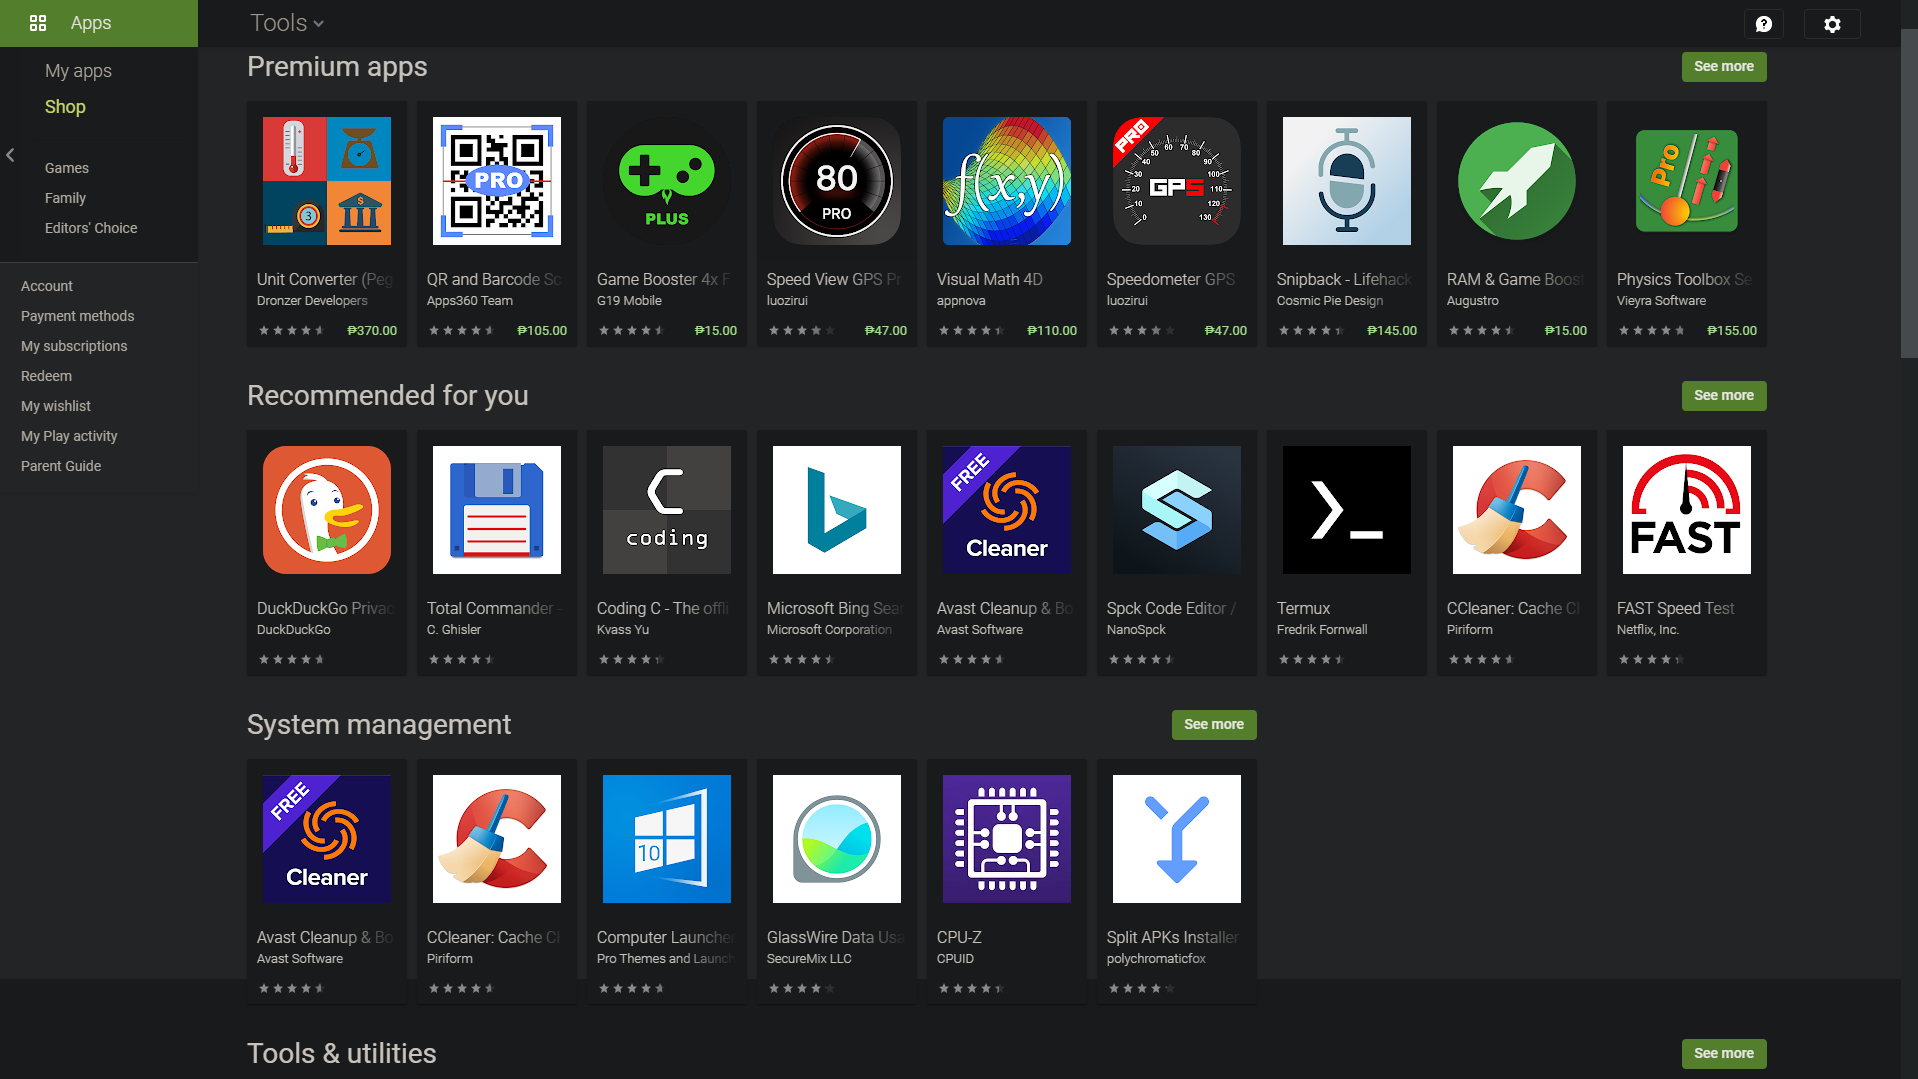
The data gathered are somewhat lacking and doesn't introduce profitable characteristics that we can conclude because these data are the most occuring genres in the google play and doesn't bring the bigger picture about the most attracting application to users which is our goal. However, we can also use this genre later and determine the number of installs and reviews if this genre has the potential to be profitable.

### Walkthrough Explanation ( iOS Ratings Analysis )
With the results above, having **Tools**, **FAMILY** and **Games** dominating the most occuring applications in both platform, let's see what are the ratings of applications in ios.

In the below code:
1. Create a function
2. Create a frequency table with our helper function `freq_table` and create a list `app_sort` for sorting later.
3. Iterate over the frequency table created in step 1.
4. Initialize variables as counting variables for `total` ratings and `len_genre`.
5. Iterate oveer iOS dataset one by one.
6. Assign the rating column in a variable for readability
7. Check if the current iterating `genre` in `unique_genre` is equal to the current iterating `genre_app` in `final_ios`.
8. If yes, convert the `rating` column in float and assign it to a variable, sum all the rating in `total` variable and increment `len_genre` by 1 to count each genre that passes.
9. After all the iteration is done, calculate the `avg_user_rating` by dividing the `total` sum of the rating and the `len_genre` of each genre,
10. Make a tuple and make the `avg_user_rating` as a first value to sort the list `app_sort`
11. Use the `sorted()` function into the `app_sort` list and assign it to another variable.
12. Display the formatted output.

In [83]:
def display_category_value(dataset, index):
    """Function to display each category / genre's installs / rating
    
    Args:
     - dataset: list of list dataset.
     - index: column of interest (category / genre).
     
    Returns:
     - None: Displays the formatted output string limitted to 20 rows
    """
    unique_genre = freq_table(dataset, index); # Make frequency table of given dataset and index position of column of interest
    app_sort = []; # List of tupple to be sorted later
    num_apps = 0 # Limit the displayed output
    
    for category in unique_genre:
        total = 0; # Sum of all
        len_category = 0; # Count of how many genre

        for row in dataset:
            category_app = row[index];

            # Check if genre_app in `final_ios` is in `unique_genre` to count all unique genres
            if category_app == category:
                
                if dataset == final_android or dataset == paid_android:
                    n_install = row[5]; # installs column
                    # Remove unnecessary symbols to convert to float
                    n_install = n_install.replace("+", "");
                    n_install = n_install.replace(",","");

                    total += float(n_install);
                    len_category += 1;
                    
                elif dataset == final_ios or dataset == paid_ios:
                    ratings = float(row[5]);
                    total += ratings;
                    len_category += 1;
                    
                else:
                    return "Wrong Dataset!"

        avg_value = total / len_category; # Get the average user rating on each genre
        app_sort.append((avg_value, category)); # Create a list of tuppled apps to sort for later

    sorted_apps = sorted(app_sort, reverse=True); # Sort apps in descending order

    for value, apps in sorted_apps: # Iterate to the sorted apps
        if num_apps < 20:
            print("{app_name} : {value:,.2f}".format(app_name=apps, value=value)) # Format output
            num_apps += 1;

In [85]:
print("Average User Rating per Category in Descending Order");
print("----------------------------------------------------");
display_category_value(final_ios, 11); # column #11 is prime_genre column

Average User Rating per Category in Descending Order
----------------------------------------------------
Social Networking : 60,253.85
Music : 29,047.11
Reference : 27,037.19
Shopping : 26,635.01
Finance : 23,353.53
Weather : 23,145.25
Food & Drink : 19,934.39
Navigation : 19,370.82
Travel : 19,030.18
News : 16,980.32
Games : 15,586.76
Sports : 15,350.91
Photo & Video : 14,688.72
Health & Fitness : 10,802.16
Book : 10,359.20
Lifestyle : 8,930.37
Entertainment : 8,862.41
Productivity : 8,508.09
Utilities : 7,927.53
Business : 5,149.32


#### Output Explanation (`avg_user_rating` )
###### Apple Store `avg_user_rating` 
We can clearly see that **Social Networking**, **Reference**, and **Music** skewed the result for this analysis. You may be thinking that this is due to tech giants like Facebook, Google Maps, Spotify etc. that made this result skewed. Let's test our hypothesis.

We can create a function that displays all the application in a specific category of interest and also display its number of installs or reviews depending on what dataset given, sort the numeric values and format the output for us everytime we call it. Our logic is clear, let's see it in code!

In the below code, we:
1. Initialize a `num_apps` to limit the displayed results and `app_installs` list of tupples to sort later.
2. Iterate over the Android dataset.
3. Check if the current iteration has "COMMUNICATION" category.
4. If yes, append the tupple with (number_of_reviews, name_of_app) as format in `app_installs`.
5. If all the iteration are done, use the `sorted()` function to sort `app_installs` and assign it to `sorted_apps`
6. Iterate over `sorted_apps` 
7. Check if the limit `num_apps` is less than 25
8. Display the formatted output
9. Increment `num_apps` everytime that we have displayed 1 row

> It looks like we are going to use this function everywhere in our analysis, let's turn this algorithm into a function to apply DRY principle

In [110]:
def display_app_review(dataset, index, genre_name):
    """Function to display reviews of a given genre
    
    Args:
     - dataset: The list of list dataset.
     - index: The position of the column of interest (Counting starts with zero)
     - genre_name: The genre/category that we want to display the apps.
     
    Returns:
     - None: It prints the formatted output of the app name and number of reviews.
    """
    num_apps = 0; # Variable to limit the result
    app_installs = []; # List of tupples to sort later

    for app in dataset:
        column = app[index]; # Given column of category / genre

        if dataset == final_android or dataset == paid_android:
            if column == genre_name: # Check if column is equal to given genre
                app_installs.append((int(app[3]), app[0])); # app[3] is Reviews column and app[0] is App column
            
        elif dataset == final_ios or dataset == paid_ios:            
            if column == genre_name:
                app_installs.append((int(app[5]), app[1]));
#                 print("{app_name} : {num_ratings:,}".format(app_name=app[1], num_ratings=int(app[5]))); # app[1] is App Name and app[5] is number ratings for all versions

    sorted_apps = sorted(app_installs, reverse=True); # Sort app_installs into descending
    for value, apps in sorted_apps: # Iterate over the sorted list of tupples (sorted_apps);
        if num_apps < 20: # truncate the result to only 25 apps
            print("{app_name} : {num_reviews:,}".format(app_name=apps, num_reviews=value)); # Formatted output
            num_apps += 1; # count the number of apps displayed

In [91]:
print("User Rating Total per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(final_ios, 11, "Social Networking"); 

User Rating Total per Application in Descending Order
-----------------------------------------------------
Facebook : 2,974,676
Pinterest : 1,061,624
Skype for iPhone : 373,519
Messenger : 351,466
Tumblr : 334,293
WhatsApp Messenger : 287,589
Kik : 260,965
ooVoo – Free Video Call, Text and Voice : 177,501
TextNow - Unlimited Text + Calls : 164,963
Viber Messenger – Text & Call : 164,249
Followers - Social Analytics For Instagram : 112,778
MeetMe - Chat and Meet New People : 97,072
We Heart It - Fashion, wallpapers, quotes, tattoos : 90,414
InsTrack for Instagram - Analytics Plus More : 85,535
Tango - Free Video Call, Voice and Chat : 75,412
LinkedIn : 71,856
Match™ - #1 Dating App. : 60,659
Skype for iPad : 60,163
POF - Best Dating App for Conversations : 52,642
Timehop : 49,510


In [90]:
print("User Rating Total per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(final_ios, 11, "Music"); 

User Rating Total per Application in Descending Order
-----------------------------------------------------
Pandora - Music & Radio : 1,126,879
Spotify Music : 878,563
Shazam - Discover music, artists, videos & lyrics : 402,925
iHeartRadio – Free Music & Radio Stations : 293,228
SoundCloud - Music & Audio : 135,744
Magic Piano by Smule : 131,695
Smule Sing! : 119,316
TuneIn Radio - MLB NBA Audiobooks Podcasts Music : 110,420
Amazon Music : 106,235
SoundHound Song Search & Music Player : 82,602
TuneIn Radio Pro - MLB Audiobooks Podcasts Music : 71,609
Sonos Controller : 48,905
Tabs & Chords by Ultimate Guitar - learn and play : 35,045
I Am T-Pain 2.0 : 32,650
Bandsintown Concerts : 30,845
Karaoke - Sing Karaoke, Unlimited Songs! : 28,606
My Mixtapez Music : 26,286
Sing Karaoke Songs Unlimited with StarMaker : 26,227
Ringtones for iPhone & Ringtone Maker : 25,403
Musi - Unlimited Music For YouTube : 25,193


In [92]:
print("User Rating Total per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(final_ios, 11, "Reference"); 

User Rating Total per Application in Descending Order
-----------------------------------------------------
Bible : 985,920
Dictionary.com Dictionary & Thesaurus : 200,047
Dictionary.com Dictionary & Thesaurus for iPad : 54,175
Google Translate : 26,786
Sky Guide: View Stars Night or Day : 22,100
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18,418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17,588
Merriam-Webster Dictionary : 16,849
Night Sky : 12,122
Dictionary.com Dictionary & Thesaurus Premium : 11,530
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8,535
WolframAlpha : 7,410
e-Sword HD: Bible Study Made Easy : 7,309
iHandy Translator Pro : 5,163
Dictionary.com Premium Dictionary & Thesaurus for iPad : 4,922
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4,693
Speak & Translate － Live Voice and Text Translator : 4,344
National Geographic World Atlas : 4,255
Knots 3D : 3,

#### Output Explanation
##### Apple Store **Social Networking** Genre
Our hypothesis is correct, both genre (**Social Networking**, **Music**) is swarming with large companies and we will be engulf by them if we make an app in those category hence we will avoid those category. This is also true with **Photo & Video** while **Reference** has niche thus we will proceed with **Games**.

In [93]:
print("User Rating Total per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(final_ios, 11, "Games"); 

User Rating Total per Application in Descending Order
-----------------------------------------------------
Clash of Clans : 2,130,805
Temple Run : 1,724,546
Candy Crush Saga : 961,794
Angry Birds : 824,451
Subway Surfers : 706,110
Fruit Ninja Classic : 698,516
Solitaire : 679,055
CSR Racing : 677,247
Crossy Road - Endless Arcade Hopper : 669,079
Injustice: Gods Among Us : 612,532
Hay Day : 567,344
Clear Vision (17+) : 541,693
Minecraft: Pocket Edition : 522,012
PAC-MAN : 508,808
DragonVale : 503,230
Head Soccer : 481,564
Despicable Me: Minion Rush : 464,312
The Sims™ FreePlay : 446,880
Plants vs. Zombies : 426,463
Sonic Dash : 418,033


#### Output Explanation
##### Apple Store **Games** Genre
At first look we can see that **Games** has a wide variety of gameplay with _different companies_ at the top of our list. We can also see some straight forward games like "Candy Crush Saga", "Angry Birds", and "PAC-MAN" being in the top spot. This is a good indication of developing an app because we can thrive in this genre with a fairly simple app that is unique without having a background or expertise in other fields. Our [test function](#test-function) also proves that users in iOS has the most satisfied experience since **Games** has the most occurring category with a rating of 4.4 above!

### Walkthrough Explanation ( Android Category Analysis )
With both **Family** category and **Tools** genre being popular in Google Play market, let's see the numbers for the `category` column. Since Android dataset doesn't have `review's` column unlike iOS dataset, we will resort into the `Install` column since this is the closest column into identifying the number of users.

In [30]:
print(android_header, "\n")
explore_data(final_android, 0, 5)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Eve

Upon a closer inspection into `Installs` column, we can see that there are non-digit characters present in the value. We can't directly convert this into integer because Python doesn't know how to convert apostrophe and the plus sign. We first need to remove this by using the `replace()` function like so:

In [31]:
non_digit = "1000,abc";

digit = non_digit.replace(",", "");
digit = digit.replace("abc", "");
digit = int(digit);
print(digit)

1000


Since the problem is addressed in our function creation `display_category_value`, let's dive into coding!

In [58]:
print("Average User Install per Category in Descending Order");
print("-----------------------------------------------------");
display_category_value(final_android, 1)

Average User Install per Category in Descending Order
-----------------------------------------------------
COMMUNICATION : 38,456,119.17
VIDEO_PLAYERS : 24,852,732.41
SOCIAL : 23,253,652.13
ENTERTAINMENT : 21,134,600.00
PHOTOGRAPHY : 17,805,627.64
PRODUCTIVITY : 16,787,331.34
GAME : 15,837,565.09
TRAVEL_AND_LOCAL : 13,984,077.71
TOOLS : 10,695,245.29
NEWS_AND_MAGAZINES : 9,549,178.47
BOOKS_AND_REFERENCE : 8,767,811.89
SHOPPING : 7,036,877.31
PERSONALIZATION : 5,201,482.61
WEATHER : 5,074,486.20
HEALTH_AND_FITNESS : 4,188,821.99
MAPS_AND_NAVIGATION : 4,056,941.77
SPORTS : 3,638,640.14
EDUCATION : 3,082,017.54
FAMILY : 2,691,618.16
FOOD_AND_DRINK : 1,924,897.74


#### Output Explanation
##### Google Play `avg_install`
We are going way past **COMMUNICATION**, **VIDEO_PLAYERS**, **SOCIAL** and lots of others and were focusing in **GAME** category as we are much more knowledgeable in the the previous cells that this categories tend to have tech giants in it and we will be engulf if we push through in this categories. But for assurance we will still look into it.

In [53]:
num_apps = 0; # Variable to limit the displayed result
for app in final_android:
    if app[1] == "COMMUNICATION" and num_apps < 10:
        print("{app_name} : {num_ratings:,}".format(app_name=app[0], num_ratings=int(app[3]))); # app[1] is App Name and app[5] is number ratings for all versions
        num_apps += 1;

Messenger – Text and Video Chat for Free : 56,642,847
WhatsApp Messenger : 69,119,316
Messenger for SMS : 125,257
Google Chrome: Fast & Secure : 9,642,995
Messenger Lite: Free Calls & Messages : 1,429,035
Gmail : 4,604,324
Hangouts : 3,419,249
Viber Messenger : 11,334,799
My Tele2 : 158,679
Firefox Browser fast & private : 3,075,028


BUT WAIT! We have a problem, doing the exact code to display the number of ratings in iOS dataset didn't exactly live to expectations here in Android dataset. We can see that it isn't sorted, this is going to be hard to see which application dominates the top and so we are going to borrow the logic of our code [here](#sort_values)! Making a tuple and swapping the values! Let's test this out in the next cell.

In [63]:
print("User Reviews per Application in Descending Order");
print("------------------------------------------------");
display_app_review(final_android, 1, "COMMUNICATION"); 

User Reviews per Application in Descending Order
------------------------------------------------
WhatsApp Messenger : 69,119,316
Messenger – Text and Video Chat for Free : 56,642,847
UC Browser - Fast Download Private & Secure : 17,712,922
BBM - Free Calls & Messages : 12,842,860
Viber Messenger : 11,334,799
LINE: Free Calls & Messages : 10,790,289
Skype - free IM & video calls : 10,484,169
Google Chrome: Fast & Secure : 9,642,995
Truecaller: Caller ID, SMS spam blocking & Dialer : 7,820,209
WeChat : 5,387,333
Opera Mini - fast web browser : 5,149,854
imo free video calls and chat : 4,785,892
Gmail : 4,604,324
Yahoo Mail – Stay Organized : 4,187,998
UC Browser Mini -Tiny Fast Private & Secure : 3,648,120
Hangouts : 3,419,249
Telegram : 3,128,250
Firefox Browser fast & private : 3,075,028
GO SMS Pro - Messenger, Free Themes, Emoji : 2,876,500
KakaoTalk: Free Calls & Text : 2,546,527


Now we can see that by using our swapping logic, we have sorted the output into descending order. Now we can move on into our analysis.

In [64]:
print("User Reviews per Application in Descending Order");
print("------------------------------------------------");
display_app_review(final_android, 1, "PRODUCTIVITY")

User Reviews per Application in Descending Order
------------------------------------------------
ES File Explorer File Manager : 5,383,985
Microsoft Outlook : 3,252,896
Adobe Acrobat Reader : 3,016,297
SwiftKey Keyboard : 2,764,964
Google Drive : 2,731,171
ColorNote Notepad Notes : 2,401,017
Microsoft Word : 2,084,126
Dropbox : 1,861,310
Mobizen Screen Recorder - Record, Capture, Edit : 1,827,212
WPS Office - Word, Docs, PDF, Note, Slide & Sheet : 1,508,137
CamScanner - Phone PDF Creator : 1,502,622
My Airtel-Online Recharge, Pay Bill, Wallet, UPI : 1,498,393
Evernote – Organizer, Planner for Notes & Memos : 1,488,396
AVG Cleaner – Speed, Battery & Memory Booster : 1,188,154
MyVodafone (India) - Online Recharge & Pay Bills : 1,092,367
Microsoft Excel : 1,079,491
APUS Booster - Space Cleaner & Booster : 1,048,766
Microsoft OneDrive : 1,038,306
Alarm Clock: Stopwatch & Timer : 870,928
Google Calendar : 858,208


#### Output Explanation
##### Google Play **Communication** and **Productivity** categories
At first look in the previous two cells we can see for our selfs that tech giants are reigning here so we will drop this argument with coolness and respect. We will proceed in looking in much deeper in **Games**.

In [65]:
print("User Reviews per Application in Descending Order");
print("------------------------------------------------");
display_app_review(final_android, 1, "GAME")

User Reviews per Application in Descending Order
------------------------------------------------
Clash of Clans : 44,891,723
Subway Surfers : 27,722,264
Clash Royale : 23,133,508
Candy Crush Saga : 22,426,677
My Talking Tom : 14,891,223
8 Ball Pool : 14,198,297
Shadow Fight 2 : 10,979,062
Pou : 10,485,308
Pokémon GO : 10,424,925
Minion Rush: Despicable Me Official Game : 10,216,538
Yes day : 10,055,521
Dream League Soccer 2018 : 9,882,639
My Talking Angela : 9,881,829
Hill Climb Racing : 8,923,587
Asphalt 8: Airborne : 8,389,714
Mobile Legends: Bang Bang : 8,219,586
Piano Tiles 2™ : 8,118,880
Temple Run 2 : 8,118,609
Sniper 3D Gun Shooter: Free Shooting Games - FPS : 7,671,249
Farm Heroes Saga : 7,614,130


#### Output Explanation
##### Google Play **Games** category
Since the category **"GAMES"** appeared in our one of the most installs and reviews in iOS and Android and one of the least outliers influenced by tech giants like **"Entertainment"**, **"Weather"**, and **"Communications"** in Google Play Store and Apple Store, we can use this data as our genre in creating an application since we can clearly see that games has a wide variety, simple gameplay and doesn't require expertise in different fields as we are seeing with **Candy Crush Saga**, **Temple Run** and **Piano Tiles** having huge reviews even though we didn't count users that doesn't gave any review. 

Since we have identified that **FAMILY** and **Game** are the most occuring categories that have 4.4 rating and up in our test function, we can invent a **Game** on our own with the category of **FAMILY** and integrate our ads since our target audience is kids so ads uncapable of disturbance is ideal and it works for our target audience. We can create a baking app with the functionality of multiplayer for parents and their kids or a gardening game, the possibilities are endless in this genre. 

*The devs now can use the data generated here to form their **Game** based on the high ranking of reviews and installs in this analysis, hence we will let them decide on which game they will make.*

### Walkthrough Explanation ( Android Genre Analysis )
Since we are done with category analysis, we are not yet done as `genre` poses some patterns that we are not aware of. Let's dig into it!

Since we have identified [here](#genre-column) that **Tools** and **Entertainment** are the broader view of the most occuurance of applications, let's see if we find pattern that will help our goal.

In [60]:
print("Average Install per Category in Descending Order");
print("------------------------------------------------");
display_category_value(final_android, 9)

Communication : 38,456,119.17
Adventure;Action & Adventure : 35,333,333.33
Video Players & Editors : 24,947,335.80
Social : 23,253,652.13
Arcade : 22,888,365.49
Casual : 19,569,221.60
Puzzle;Action & Adventure : 18,366,666.67
Photography : 17,805,627.64
Educational;Action & Adventure : 17,016,666.67
Productivity : 16,787,331.34
Racing : 15,910,645.68
Travel & Local : 14,051,476.15
Casual;Action & Adventure : 12,916,666.67
Action : 12,603,588.87
Strategy : 11,199,902.53
Tools : 10,696,176.00
Tools;Education : 10,000,000.00
Role Playing;Brain Games : 10,000,000.00
Lifestyle;Pretend Play : 10,000,000.00
Casual;Music & Video : 10,000,000.00


#### Output Explanation 
We can see some useful genres here that we can integrate  into our game, let's dive deeper into 3 genre profile!

In [37]:
print("User Reviews per Application in Descending Order");
print("------------------------------------------------");
display_app_review(final_android, 9, "Tools")

Clean Master- Space Cleaner & Antivirus : 42,916,526
Security Master - Antivirus, VPN, AppLock, Booster : 24,900,999
360 Security - Free Antivirus, Booster, Cleaner : 16,771,865
DU Battery Saver - Battery Charger & Battery Life : 13,479,633
Cache Cleaner-DU Speed Booster (booster & cleaner) : 12,759,663
Battery Doctor-Battery Life Saver & Battery Cooler : 8,190,074
Google : 8,033,493
SHAREit - Transfer & Share : 7,790,693
AVG AntiVirus 2018 for Android Security : 6,207,063
Google Translate : 5,745,093
Avast Mobile Security 2018 - Antivirus & App Lock : 5,180,480
Applock : 4,934,130
AppLock : 4,931,562
GO Keyboard - Cute Emojis, Themes and GIFs : 4,594,198
Tiny Flashlight + LED : 4,254,879
CM Locker - Security Lockscreen : 3,090,727
Master for Minecraft(Pocket Edition)-Mod Launcher : 2,674,051
Kaspersky Mobile Antivirus: AppLock & Web Security : 2,598,579
Clean Master Lite - For Low-End Phone : 2,246,379
Gboard - the Google Keyboard : 1,859,115


#### Output Explanation
##### Google Play `Tools` Genre
This genre is no good, we are seeing some outliers that has huge gaps between one another, app created here will be like ants that can be easily crushed. Let's look at "Productivity" and see if this one poses some potential.

In [38]:
print("User Reviews per Application in Descending Order");
print("------------------------------------------------");
display_app_review(final_android, 9, "Productivity")

ES File Explorer File Manager : 5,383,985
Microsoft Outlook : 3,252,896
Adobe Acrobat Reader : 3,016,297
SwiftKey Keyboard : 2,764,964
Google Drive : 2,731,171
ColorNote Notepad Notes : 2,401,017
Microsoft Word : 2,084,126
Dropbox : 1,861,310
Mobizen Screen Recorder - Record, Capture, Edit : 1,827,212
WPS Office - Word, Docs, PDF, Note, Slide & Sheet : 1,508,137
CamScanner - Phone PDF Creator : 1,502,622
My Airtel-Online Recharge, Pay Bill, Wallet, UPI : 1,498,393
Evernote – Organizer, Planner for Notes & Memos : 1,488,396
AVG Cleaner – Speed, Battery & Memory Booster : 1,188,154
MyVodafone (India) - Online Recharge & Pay Bills : 1,092,367
Microsoft Excel : 1,079,491
APUS Booster - Space Cleaner & Booster : 1,048,766
Microsoft OneDrive : 1,038,306
Alarm Clock: Stopwatch & Timer : 870,928
Google Calendar : 858,208


#### Output Explanation
##### Google Play `Productivity` Genre
No good here also, we are seeing multiple apps for one tech giants. There is no way that our application here will be noticed if we push to create an app here. Let us now look at "Entertainment".

In [73]:
print("User Reviews per Application in Descending Order");
print("------------------------------------------------");
display_app_review(final_android, 9, "Arcade")

User Reviews per Application in Descending Order
------------------------------------------------
Subway Surfers : 27,722,264
Piano Tiles 2™ : 8,118,880
Geometry Dash Lite : 6,181,640
Hungry Shark Evolution : 6,074,334
Angry Birds Classic : 5,566,669
Fruit Ninja® : 5,091,448
Zombie Tsunami : 4,920,817
Jetpack Joyride : 4,638,163
Smash Hit : 4,147,718
Temple Run : 4,000,433
Sonic Dash : 3,778,921
Cooking Fever : 3,197,865
Vector : 3,058,687
Angry Birds Rio : 2,610,526
Glow Hockey : 1,703,479
Geometry Dash Meltdown : 1,591,129
Red Ball 4 : 1,432,447
Angry Birds Star Wars : 1,218,055
Ant Smasher by Best Cool & Fun Games : 1,185,148
Skater Boy : 1,167,143


#### Output Explanation ( Arcade )
##### Google Play `Arcade` Genre
It seems like we have a brand new mixture here! Combining **FAMILY**, **Games** and **Arcade** as an application game might be the thing that we are looking for! How about a "Bake" game arcade style of gamplay? How about "Dental Care" game arcade style to educate kids on Dental Care? We are leaving the decisions to the developers to narrow down what games that they can build for profit.

### Walkthrough Explanation ( iOS Paid Application)
Our boss is delighted to what we have done! Our boss is extending our work and would like to find out the answer to the question: "Assume we could also make revenue via in-app purchases and subscriptions, and try to find out which genres seem to be liked the most by users". Let's Dive In!

With a little tweaking into our function, we can reuse it into the `paid_ios` and `paid_android`. Now we are seeing reusability and extensibility!

In [98]:
print("User Rating Total per Application in Descending Order");
print("-----------------------------------------------------");
display_category_value(paid_ios, 11);

User Rating Total per Application in Descending Order
-----------------------------------------------------
Games : 6,695.86
Business : 4,043.47
News : 3,872.36
Weather : 3,248.41
Music : 2,759.20
Shopping : 2,722.00
Health & Fitness : 2,679.85
Photo & Video : 2,531.52
Reference : 2,400.37
Productivity : 2,247.93
Entertainment : 2,131.51
Utilities : 1,326.68
Catalogs : 1,309.00
Navigation : 1,174.59
Lifestyle : 902.77
Finance : 882.85
Medical : 663.73
Education : 640.97
Travel : 602.95
Food & Drink : 579.50


#### Output Explanation
The tables has turned! In "Free" apps, **Games** are in the middle list, In "Paid" **Games** it is now in the top spot with **Business** behind. On top of that, it seems users tend to give **Games** a higher rating in both Paid and Free apps. This is a good indication of inviting users in the game as users tend to decide wether to use the app or not based on ratings. 

We will grab 3 Category profiles that we think that has not any big companies in it. Based on our previous analysis, we will avoid **News**, **Weather**, and **Music**.

In [99]:
print("User Rating Total per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(paid_ios, 11, "Utilities");

User Rating Total per Application in Descending Order
-----------------------------------------------------
Living Earth - Clock & Weather : 25,475
Photon Flash Player for iPad - Flash Video & Games plus Private Web Browser : 20,951
Scan - QR Code and Barcode Reader : 12,590
Skins Pro Creator for Minecraft : 7,943
Dreamdays: Count Down to the Days that Matter : 7,863
Puffin Browser Pro : 7,565
Swype : 7,216
Calculator Pro for iPad - Scientific Calculator : 6,645
Rowmote: Remote Control for Mac : 5,531
Deliveries: a package tracker : 4,684
Photon Flash Player for iPhone - Flash Video & Games plus Private Web Browser : 4,676
Best Skins Creator Pro - for Minecraft PE & PC : 4,243
FileBrowser - Access files on remote computers : 3,230
iSafe Pro : 2,956
Network Analyzer - wifi scanner, speed test, tools : 2,840
Red Onion - Tor-powered web browser for anonymous browsing and darknet : 2,566
iCab Mobile (Web Browser) : 2,441
Files HD Pro - File Manager & Web Browser : 2,237
Emoji Keyboard for 

#### Output Explanation
We reused our function again with a little tweak! Sweet! However, **Utilities** seems like a bad taste for a company who's just starting to grow. We can't even find applications that are used regularly. Let's look another one.

In [100]:
print("User Rating Total per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(paid_ios, 11, "Productivity");

User Rating Total per Application in Descending Order
-----------------------------------------------------
Notability : 17,594
Printer Pro - Print photos, pdf and emails : 15,981
PDF Expert 6: Read, annotate & edit PDF documents : 15,248
iTranslate Voice - Speak & Translate in Real Time : 14,469
Calendars 5 - Daily Planner and Task Manager : 11,768
CARROT To-Do - Talking Task List : 11,322
iAnnotate PDF : 11,156
Home Design 3D GOLD : 9,889
Digits, the calculator for humans : 7,825
Noteshelf : 7,562
Clear – Tasks, Reminders & To-Do Lists : 7,521
Week Calendar : 7,447
iStudiez Pro – Homework, Schedule, Grades : 7,308
GoodNotes 4 - Notes & PDF : 7,004
Notepad+: Take Notes, Annotate and Write on PDF : 6,288
Notes Plus : 6,257
Duet Display : 6,165
Home Design 3D - 3D Printing Edition : 6,001
CamScanner +| PDF Document Scanner and OCR : 5,482
Fantastical 2 for iPhone - Calendar and Reminders : 5,405


#### Output Explanation
It seems like this genre needs many functionality to be called "Productivity". Our company that newly starts from making an app might not handle this genre. Let's look another Profile.

In [103]:
print("User Rating Total per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(paid_ios, 11, "Health & Fitness");

User Rating Total per Application in Descending Order
-----------------------------------------------------
White Noise : 33,426
Yoga Studio : 28,439
Runtastic PRO Running, Jogging and Fitness Tracker : 17,667
Map My Run+ - GPS Running & Workout Tracker : 16,434
MyNetDiary PRO - Calorie Counter and Food Diary : 15,188
Sleep Pillow Sounds: white noise, rain, ocean, fan : 15,116
Period Tracker Deluxe : 13,350
Fitness Buddy+ Gym Workout Exercise, Home Trainer : 10,386
5K Runner: 0 to 5K Run Trainer. Couch potato to 5K : 10,368
Instant Heart Rate+: Heart Rate & Pulse Monitor : 10,158
Map My Ride+ - GPS Cycling & Route Tracker : 10,046
Full Fitness : Exercise Workout Trainer : 7,573
Windy ~ Sleep Relax Meditate & white noise sounds : 5,285
iTrackBites Plus - Smart Weight Loss Tracker & Points Calculator for Diet Nutrition Watchers : 4,716
Pocket Yoga : 4,475
7 Minute Workout Challenge : 4,137
Couch to 5K® - Running App and Training Coach : 3,820
Runtastic Road Bike GPS Cycling Route Tracker

#### Output Explanation
It seems like we can sneak in our **Games** here. If the developers have decided to take our advice of creating a "Dental Care" Game App, We can have a paid version of that with no ads. Upon investigation, this genre hasn't seen any **Games** that promotes **Health**! We can use this as an advantage to promote our "Dental Care" **Games** App that are for **FAMILY** and **Health&Fitness**.

Paid **Health&Fitness** Apps
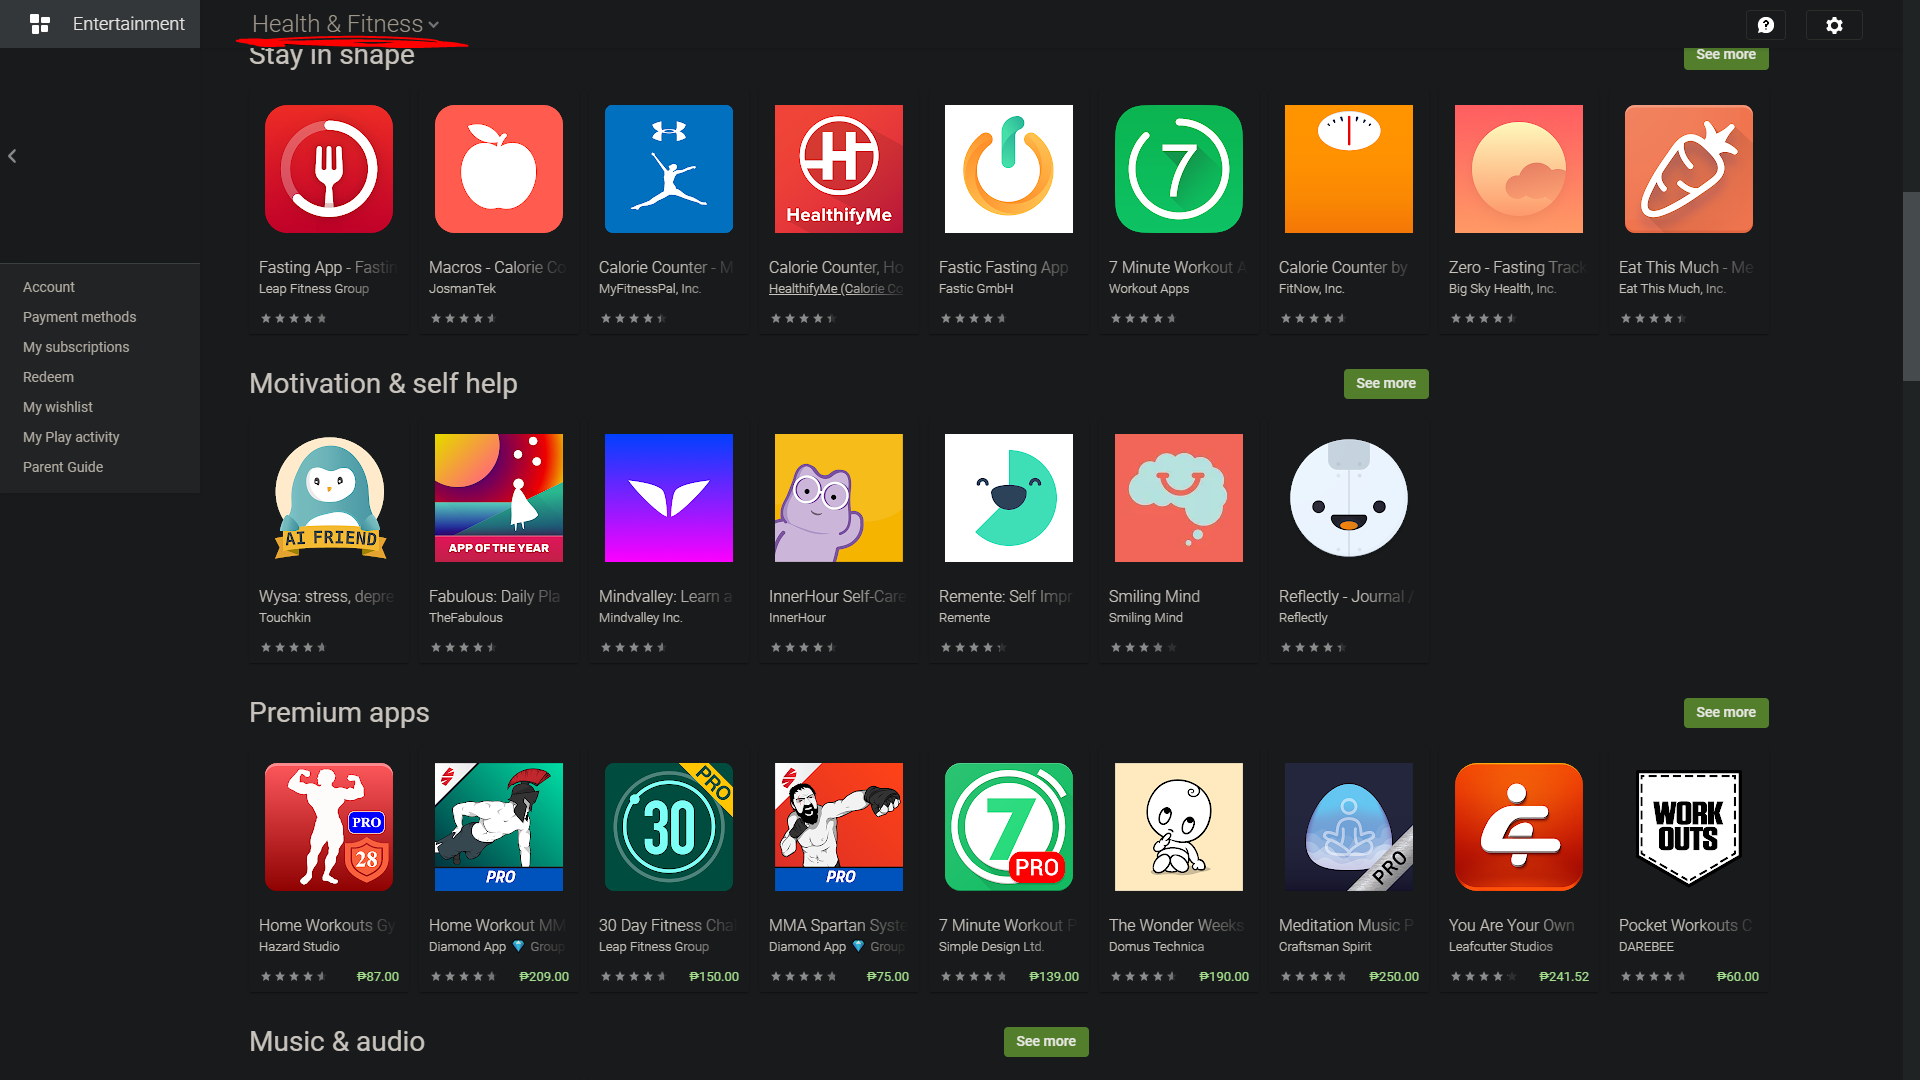

### Walkthrough Explanation ( Android Paid Application )
We are mimicking what we have done in iOS Paid Application. We are only picking 3 App Profiles that our company can handle since our company is only new to Application industry. Let's dive in!

In [106]:
print("Average Number of Install per Category in Descending Order");
print("-----------------------------------------------------");
display_category_value(paid_android, 1);

Average Number of Install per Application in Descending Order
-----------------------------------------------------
GAME : 256,097.13
EDUCATION : 150,500.00
FAMILY : 114,081.29
WEATHER : 101,500.00
ENTERTAINMENT : 100,000.00
PHOTOGRAPHY : 98,881.05
LIFESTYLE : 65,506.11
SPORTS : 51,825.62
PRODUCTIVITY : 50,430.54
COMMUNICATION : 50,372.22
PERSONALIZATION : 40,232.02
HEALTH_AND_FITNESS : 31,607.33
FOOD_AND_DRINK : 30,000.00
PARENTING : 25,050.00
AUTO_AND_VEHICLES : 25,025.00
MAPS_AND_NAVIGATION : 24,220.00
TOOLS : 22,146.68
VIDEO_PLAYERS : 17,750.00
BUSINESS : 17,731.25
TRAVEL_AND_LOCAL : 15,255.00


Since the Install column is the closest thing to knowing how many active users an app has, we are still using it here.

#### Output Explanation
It seems like the same pattern here like in the iOS Paid Application. But, let's explore three category just to be sure.

In [114]:
print("User Review per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(paid_android, 1, "EDUCATION");

User Review per Application in Descending Order
-----------------------------------------------------
Toca Life: City : 31,085
Toca Life: Hospital : 3,528
Fuzzy Numbers: Pre-K Number Foundation : 21
Sago Mini Hat Maker : 11


#### Output Explanation
It seems like not a good category to  thrive in. Not only it has niche, it has a few application to gain insights on. Let's move on the look for another.

In [115]:
print("User Review per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(paid_android, 1, "LIFESTYLE");

User Review per Application in Descending Order
-----------------------------------------------------
Sleep as Android Unlock : 23,966
Alarmy (Sleep If U Can) - Pro : 10,249
My Movies Pro - Movie & TV Collection Library : 6,477
I am rich : 3,547
💎 I'm rich : 718
Lunar Calendar : 484
I am rich VIP : 411
I'm Rich - Trump Edition : 275
Board Game Stats: Play tracking for tabletop games : 275
A41 WatchFace for Android Wear Smart Watch : 231
The Secret Daily Teachings : 206
H*nest Meditation : 145
I am Rich Person : 134
I am Millionaire - Richest guy in the town : 126
Kicker U : 124
I am extremely Rich : 41
CA Speakers : 12
AC DC Power Monitor : 1


#### Output Explanation
This category doesn't give much information if it's profitable, not to mention the troll's app "I'm Rich" and users might avoid this category and so our app. Let's see one another **Games**.

I'm Rich App
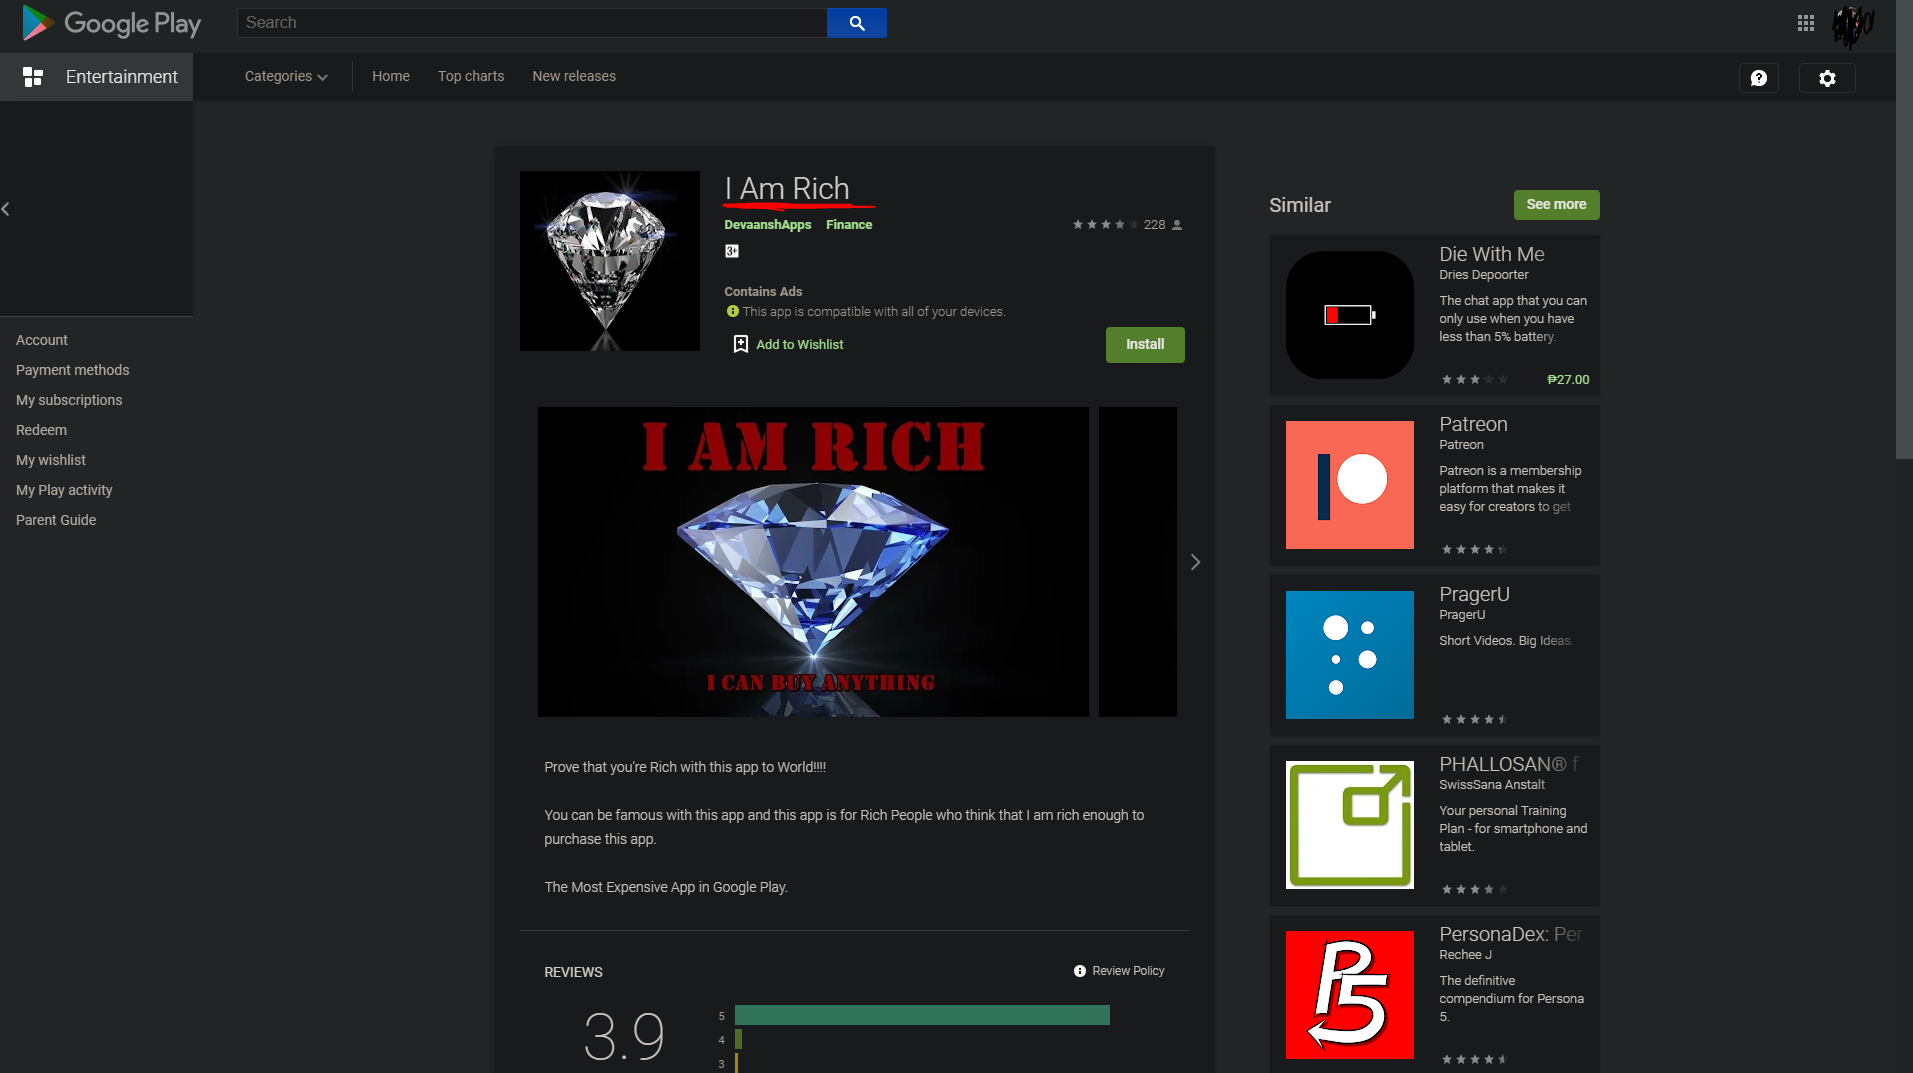

In [118]:
print("User Review per Application in Descending Order");
print("-----------------------------------------------------");
display_app_review(paid_android, 1, "GAME");

User Review per Application in Descending Order
-----------------------------------------------------
Hitman Sniper : 408,292
Grand Theft Auto: San Andreas : 348,962
Five Nights at Freddy's : 100,805
DraStic DS Emulator : 87,766
Fruit Ninja Classic : 85,468
Assassin's Creed Identity : 42,529
Stickman Legends: Shadow Wars : 38,419
Star Wars ™: DIRTY : 38,207
Skip-Bo™ : 33,661
League of Stickman 2018- Ninja Arena PVP(Dreamsky) : 32,496
Lost Journey (Dreamsky) : 32,344
Five Nights at Freddy's 3 : 27,856
Five Nights at Freddy's 4 : 21,266
The Room: Old Sins : 21,119
Clue : 19,922
The Game of Life : 18,621
Farming Simulator 18 : 18,125
Don't Starve: Pocket Edition : 17,988
Cytus II : 16,851
Five Nights at Freddy's: SL : 16,162


#### Output Explanation
Our results hasn't been varied with the "Free" Applications since **GAME** has a potential growth to our company since we can extend our created applition in "Free" Application into being "Paid". This will be a step up into our company, what will be new in our Paid Extended Application is we are integrating it in **Health&Fitness** since Parents this days are busy at work and can't teach their sons/daughters good health  habit's we can create a handful of apps that are geared towards a **Health** **Gaming** with various gameplay: "Dental Care", "Taking a Bath (Killing Germs)", and "Health Parlor" where cutting nails, cutting hair and facial massaging all integrated with one "Paid" App while the free one that has ads has only "Dental Care" as a game.

## Conclusion <a name=conclusion></a>
Our goal here is to provide enough data in the question: _"Among the applications in both Apple and Google Play Store, what are the applications that are **Free**, and **English** that are more likely to attract users"_. We achieved this by dividing our work in to two categories: Cleaning and Analyzing in the most ordered way we can possibly think. 

**Cleaning**

The steps that we take in cleaning the data set are:
1. Removing Incomplete Data Entries
2. Removing Duplicate Data Entries
3. Filtering English Applications
4. Filtering Free Applications
5. Filtering Paid Applications

**Analyzing**

We then analyzed genres in each platform in the following steps:
1. Ranked prime_genre, category and genre columns that have Most Number of Occurences
2. Ranked num_installs and user_rating 
3. Picked Three App Profiles to Analyze in each genre / category

---
We concluded that the category **Games** has the most potential for our company that is only starting making apps. To avoid adding frequent functionality and updates, we have gone into **Games** since we have noticed that simple gameplay can be rewarded huge if developed properyly. Also with our "Free" Application, we are going to extend our idea of "Dental Care" game and made an extension for that with fees like adding another game like **Health Parlor** were there is cutting nails, cutting hair, and facial massaging that are mesmerizing and fun interactions may yield profit based on the simple games that we have encountered.

Throughout this analysis, we are following the path of "Angry Birds" games since **Games** are popular in any genre and category, both free and paid that is why different companies even small ones are in the top spot of total number of install and reviews. Now we are handling this to the developers and let's see their reaction on this analysis.